## <font color = red>ITOM 6253 Assignment 5 Template</font>

### <font color = green>Assignment 5</font>

#### <font color = blue>Put your name here</font> XUELIN LIN



<font color = blue>**Q1:** Produce a table showing the four moment statistics in which we have an interest.</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
day = pd.read_csv("C:/Users/chent/Desktop/XUELIN/SMU/Model A/ITOM 6253 Programming For Analytics/Assignment/Week5/day_missing.csv")
day.dteday = pd.to_datetime(day.dteday)
day.set_index('dteday', inplace = True)
day.info() #get summary of the data
day.head() #get top 5 data


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2011-01-01 to 2012-12-31
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        713 non-null    float64
 9   atemp       710 non-null    float64
 10  hum         723 non-null    float64
 11  windspeed   710 non-null    float64
 12  casual      719 non-null    float64
 13  registered  717 non-null    float64
 14  cnt         714 non-null    float64
dtypes: float64(7), int64(8)
memory usage: 91.4 KB


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,NaN,1518.0,1600.0


In [2]:
# find the statistics using agg function
day.agg([ 'mean', 'std', 'skew', 'kurt'])

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.820891,0.474747,0.628202,0.190879,846.431154,3654.640167,4474.522409
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,3.789773,0.163682,0.142467,0.077691,687.155473,1557.749491,1931.410624
skew,0.000000,-0.000384,-0.002742,-0.008149,5.654224,0.002742,-0.793147,0.957385,12.514630,-0.135637,-0.077185,0.669206,1.269990,0.042216,-0.032882
kurt,-1.200000,-1.342601,-2.005487,-1.209112,30.052462,-1.254282,-1.374686,-0.136467,162.450518,-0.985399,-0.049114,0.403355,1.339100,-0.702715,-0.800474


<font color = blue>**Q2:** Which variables, if any, have a kurtosis that would indicate that outliers may be present?</font>

Because this is a time series we need to rethink our understanding of what an "outlier" might be. So it is critical that we plot the series in the time domain and look for large excursions from the rest of the points in the series. Plot any of the 'continuous' numeric variables that indicate the presence of outliers.

## temp has a big kurtosis, which could indicate outliers.

<Axes: title={'center': 'kurt'}>

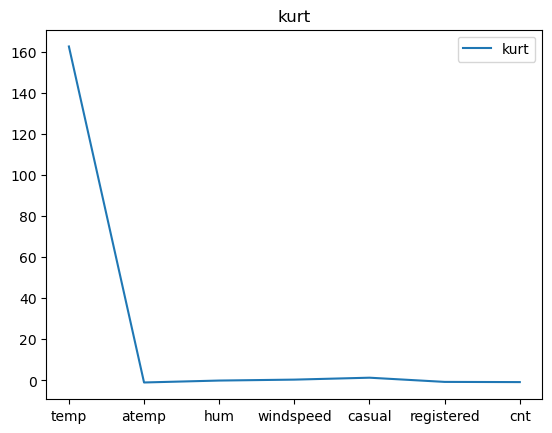

In [3]:
#display plot
%matplotlib inline
day.select_dtypes(include = ["float64"]).agg(['kurt']).T.plot(title = "kurt")

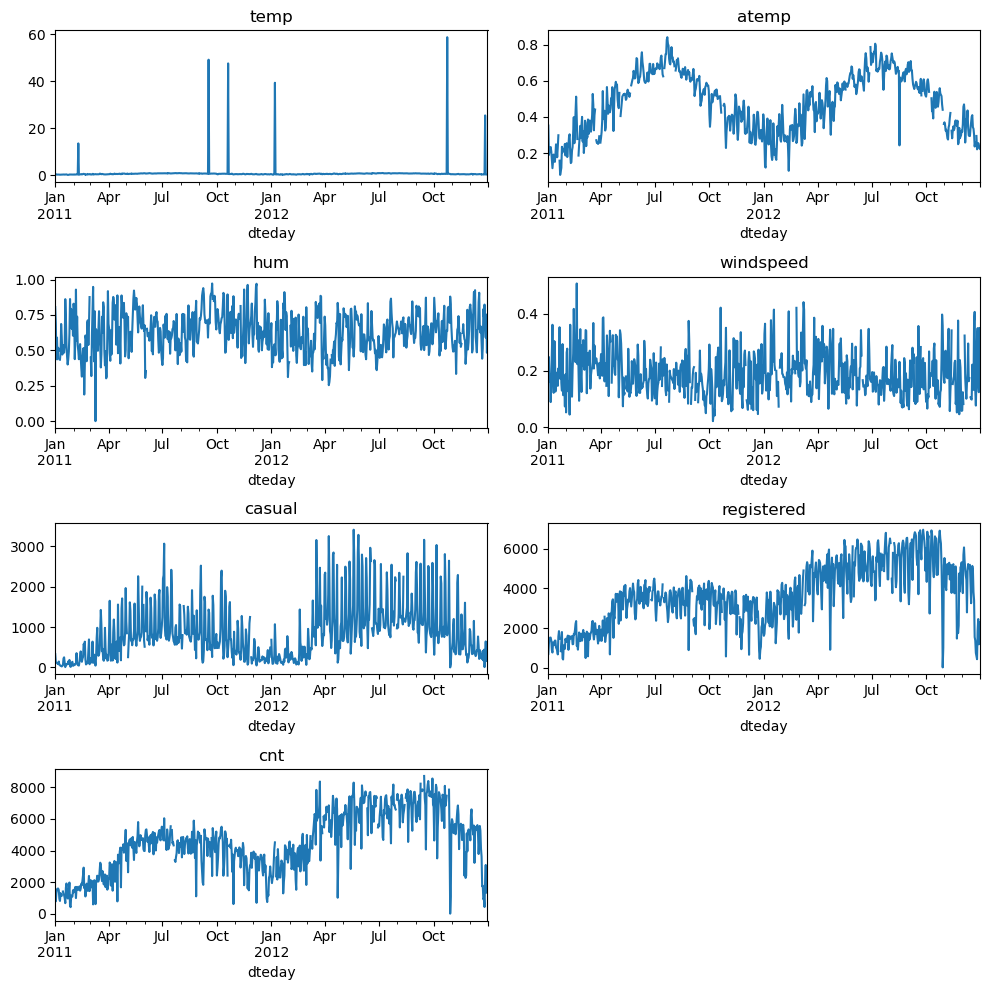

In [4]:
fig=plt.figure(figsize=(10,10))
#for loop 
for i in range(len(day.select_dtypes(include = ["float64"]).columns)):
    plt.subplot(len(day.select_dtypes(include = ["float64"]).columns)//2+1, 2, i+1) #2*n
    day[day.select_dtypes(include = ["float64"]).columns[i]].plot(title = day.select_dtypes(include = ["float64"]).columns[i])
plt.tight_layout()
plt.show()

<font color = blue>**Q3:** If you detect the presence of any outliers, set them to missing.</font>

In [5]:
day.isnull().sum() #find the total missing value and

instant        0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp          18
atemp         21
hum            8
windspeed     21
casual        12
registered    14
cnt           17
dtype: int64

In [6]:
numeric = day.select_dtypes(include = ["float64"]) # find the floast64 data
numeric_columns = numeric.columns
#for loop 
for col in numeric_columns:
    day[col] = np.where(np.abs(day[col] - day[col].mean()) > (3 * day[col].std()), np.nan, day[col])
    
day[numeric_columns].agg(['kurt'])

,temp,atemp,hum,windspeed,casual,registered,cnt
kurt,-1.125191,-0.985399,-0.516741,0.105001,0.895516,-0.702715,-0.800474


<font color = blue>**Q4:** Impute missing values to the mean for the column in which they are present.</font>

This is a time series, so the imputation of missing values is really a two step process: *downsampling* to expland the series into equal intervals throughout, followed by *upsampling* to impute the missing values.

<font color='green'>*Downsample* to expand the series into equal intervals.</font>

In [7]:
day = day.resample('D').mean()

<font color='green'> *Upsample* to fill the NAs with interpolated values.</font>

In [8]:
day = day.interpolate(method='time')

<font color='green'>Check the missing value counts and four moment statistics.</font>

In [9]:
day.isnull().sum()

instant       0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
#using agg to generate new statistic data
day.agg([ 'mean', 'std', 'skew', 'kurt'])

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495130,0.474100,0.629291,0.189972,835.034884,3655.443912,4501.782490
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183074,0.163175,0.139736,0.075966,651.317603,1556.060886,1938.608844
skew,0.000000,-0.000384,-0.002742,-0.008149,5.654224,0.002742,-0.793147,0.957385,-0.052463,-0.128505,0.062436,0.601763,1.097089,0.038196,-0.040223
kurt,-1.200000,-1.342601,-2.005487,-1.209112,30.052462,-1.254282,-1.374686,-0.136467,-1.121409,-0.985405,-0.527301,0.133051,0.729218,-0.707761,-0.806528


<font color = blue>**Q5:** After imputation, do any columns have a kurtosis that might indicate the presence of outliers?</font>


## Yes, holiday column.

<font color = blue>**Q6:** Change the date column into a type 'datetime' and then convert it to the index for the dataframe. Show the info() for the dataframe after conversion.</font>

### This is done at the data loading part at the beginning of the notebook.

In [11]:
day.info()#get summary of the data
day.head()#gettop 5 data 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2011-01-01 to 2012-12-31
Freq: D
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    float64
 1   season      731 non-null    float64
 2   yr          731 non-null    float64
 3   mnth        731 non-null    float64
 4   holiday     731 non-null    float64
 5   weekday     731 non-null    float64
 6   workingday  731 non-null    float64
 7   weathersit  731 non-null    float64
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    float64
 13  registered  731 non-null    float64
 14  cnt         731 non-null    float64
dtypes: float64(15)
memory usage: 91.4 KB


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1.0,1.0,0.0,1.0,0.0,6.0,0.0,2.0,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0
2011-01-02,2.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0
2011-01-03,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0
2011-01-04,4.0,1.0,0.0,1.0,0.0,2.0,1.0,1.0,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0
2011-01-05,5.0,1.0,0.0,1.0,0.0,3.0,1.0,1.0,0.226957,0.229270,0.436957,0.186900,98.0,1518.0,1600.0


<font color = blue>**Q7:** Produce a scatterplot matrix of the following variables: cnt, temp, hum, windspeed, atemp. Use weathersit to color the dots.</font>

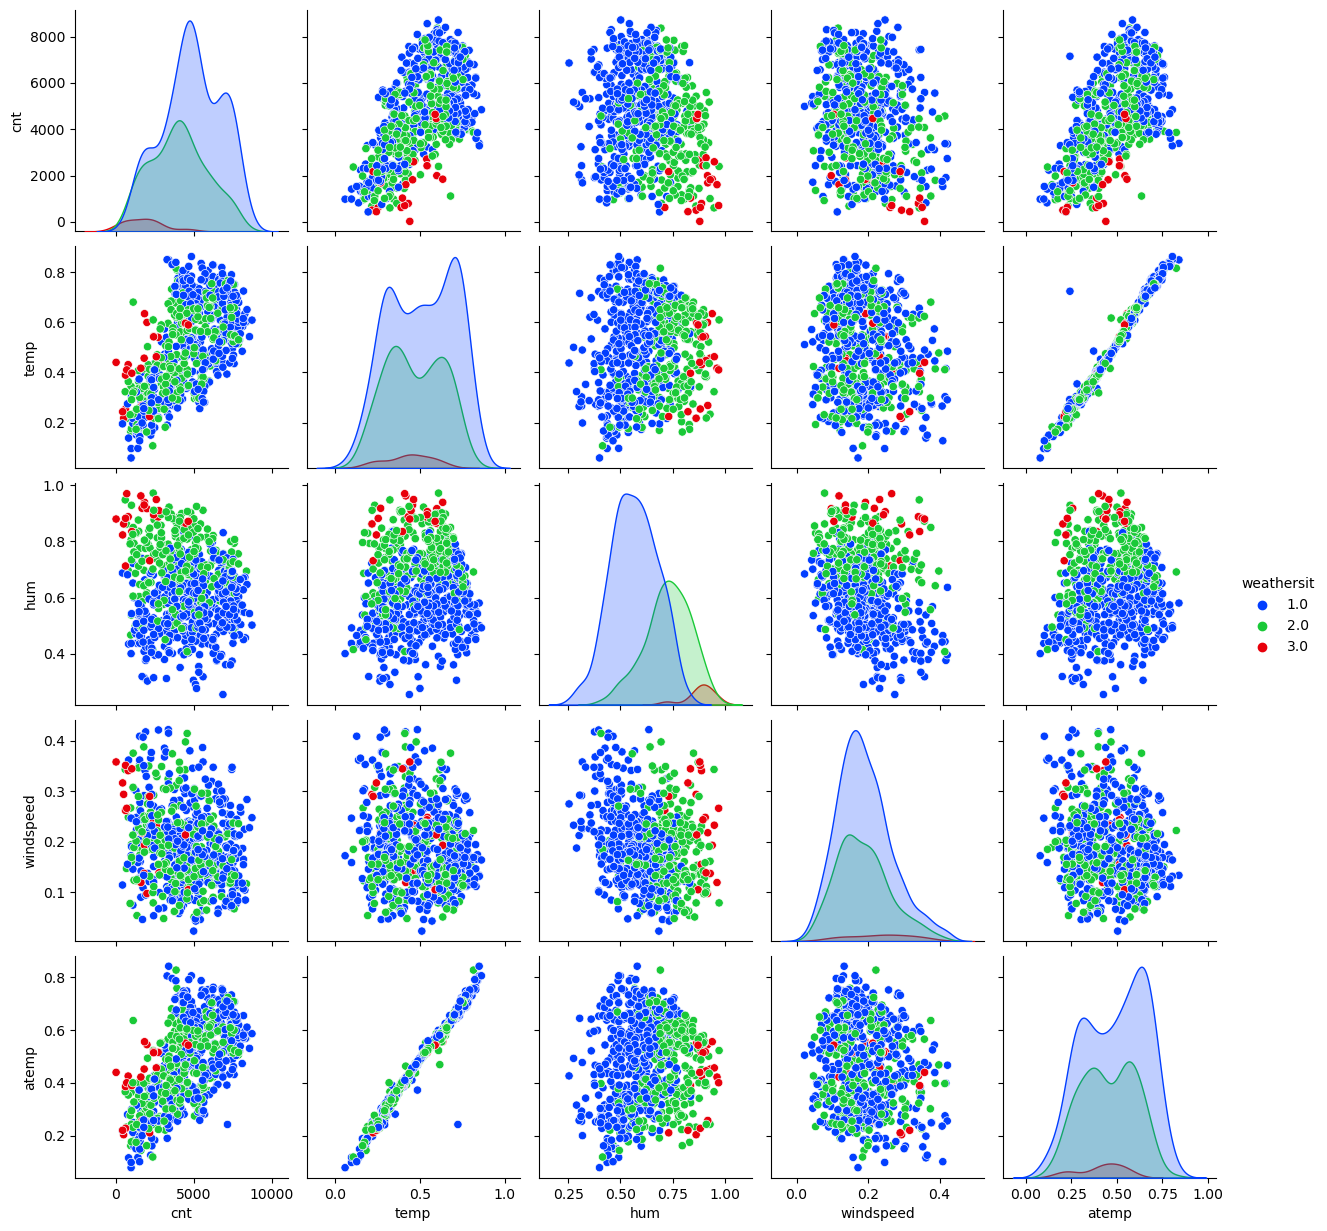

In [12]:
# day=['cnt','temp','hum','windspeed','atemp','weathersit']
# df = pd.DataFrame(day)
sb.pairplot(day.loc[:, ['cnt','temp','hum','windspeed','atemp','weathersit']], hue='weathersit', palette='bright6')
plt.show()

<font color = blue>**Q8:** Produce a chart of boxplots of cnt by season. Show them all on one chart. Be sure that the seasons are labelled with the name of the season.</font>

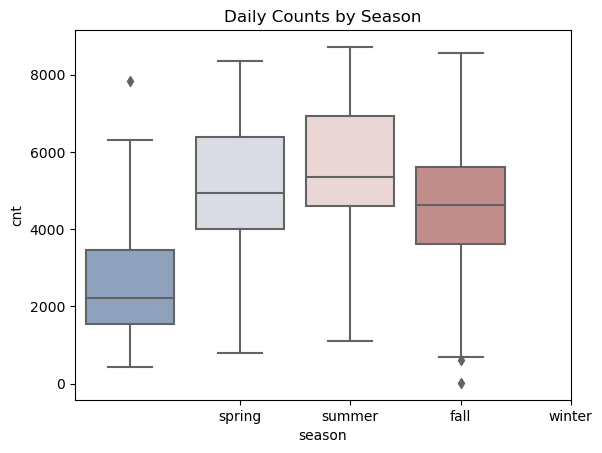

In [14]:
#set title and label
season = sb.boxplot(x="season", y="cnt", data=day,
            whis=1.5, palette="vlag")

plt.xticks([1, 2, 3, 4], ["spring", "summer", "fall", "winter"])

plt.title("Daily Counts by Season")
plt.suptitle("")
plt.show()

<font color = blue>**Q9:** Produce a scatter plot of casual vs. registered users. Show the histograms of each in the margins of the plot.</font>

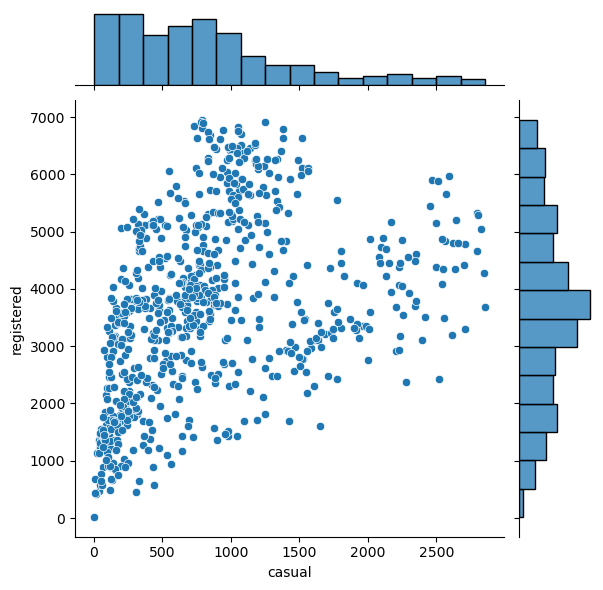

In [15]:
#using jointplot to display 2 variables
sb.jointplot(x='casual', y='registered',data=day)

<font color = blue>**Q10:** Produce a treemap with the following characteristics:

- One rectangle each for the values of weathersit.
- Label each rectangle with the name of the weathersit (not its numeric code).
- Each rectangle should have its own color.
- The size of each rectangle is determined by the cnt.
- Put a title on the chart.</font>



In [16]:
# !pip install squarify
import squarify as sq

In [17]:
count_data = day.groupby('weathersit').count()['instant'].to_frame()

In [18]:
count_data.reset_index(inplace=True)
count_data.columns = ['weathersit', 'count']
count_data.head()

,weathersit,count
0,1.0,463
1,2.0,247
2,3.0,21


####

- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

Text(0.5, 0.98, 'Counts of Weather Situation')

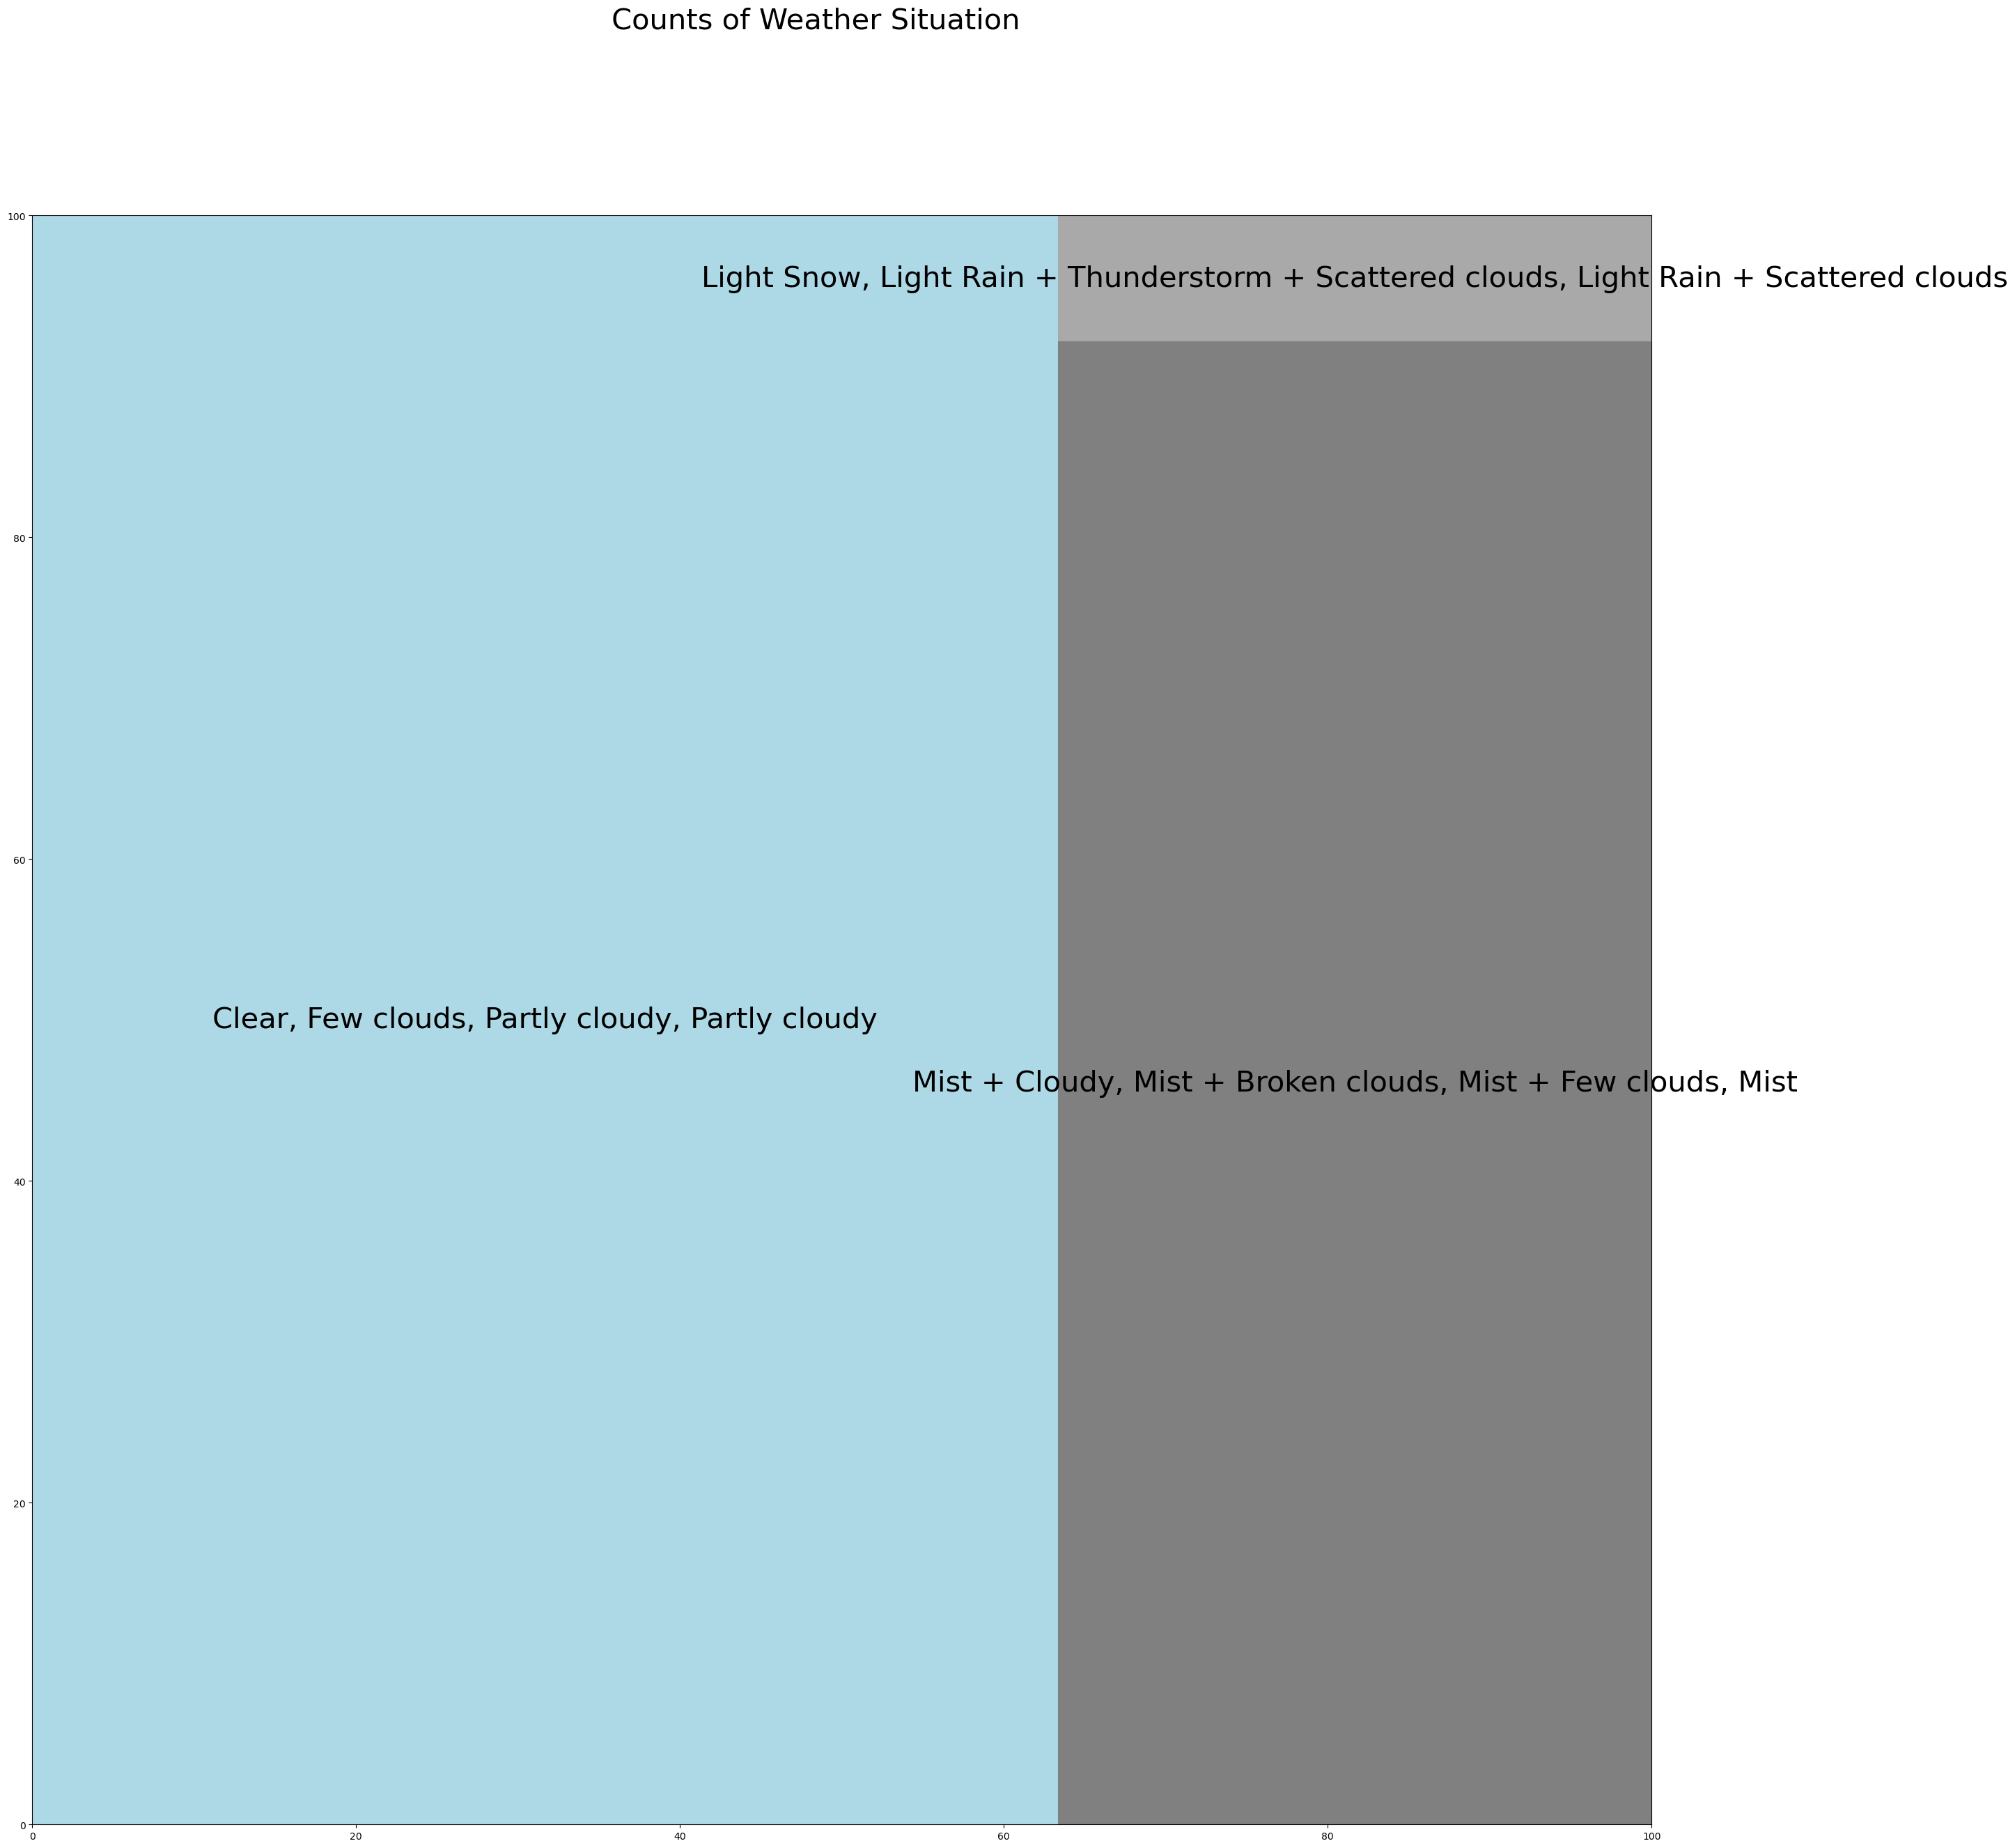

In [19]:
plt.rcParams['figure.figsize'] = (30,30)
sq.plot(sizes=count_data['count'], 
        label=['Clear, Few clouds, Partly cloudy, Partly cloudy', 
               'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
               'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds'
              ], 
        color=['lightblue', 'grey', 'darkgrey'],
        text_kwargs={'fontsize':30})
plt.suptitle("Counts of Weather Situation", fontsize=30)